# Some k-means clustering testing
and updating my old code for new data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import scipy.stats as stats

from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.htmla



In [2]:
data = pd.read_csv('combined_with_labels.csv', sep=";", header=0)
data = data.loc[data["Warning_code"] == 0]
basedf = data

In [3]:
values_cols = ["Contact_time","S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force",
               "S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time",
               "S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time",
               "S4_max_time","S4_end_time","S5_force","S5_start_time","S5_max_time","S5_end_time",
               "S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force",
               "F2_time","F3_force","F3_time"]

features_cols = ["S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force",
               "S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time",
               "S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time",
               "S4_max_time","S4_end_time","S5_force","S5_start_time","S5_max_time","S5_end_time",
               "S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force",
               "F2_time","F3_force","F3_time"]

force_cols = ["S0_force","S1_force","S2_force","S3_force","S4_force","S5_force","S6_force"]
startT_cols = ["S0_start_time","S1_start_time","S2_start_time","S3_start_time","S4_start_time","S5_start_time","S6_start_time"]
maxT_cols = ["S0_max_time","S1_max_time","S2_max_time","S3_max_time","S4_max_time","S5_max_time","S6_max_time"]
endT_cols = ["S0_end_time","S1_end_time","S2_end_time","S3_end_time","S4_end_time","S5_end_time","S6_end_time"]
phases_cols = ["F1_force","F1_time","F2_force","F2_time","F3_force","F3_time"]
phasesT_cols = ["F1_time","F2_time","F3_time"]
phasesF_cols = ["F1_time","F2_time","F3_time"]

In [4]:
data1L = data.loc[data["Left/Right"] == "L"]
data1R = data.loc[data["Left/Right"] == "R"]

labelL = data1L["label"]
labelR = data1R["label"]

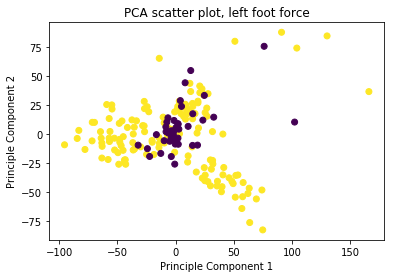

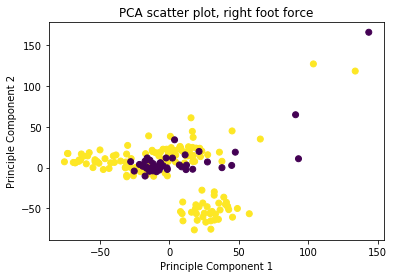

In [5]:
valuesL = data1L.loc[:,force_cols]
valuesR = data1R.loc[:,force_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/1.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/2.png')
plt.show()

k = 2 :  0.488
k = 3 :  0.389
k = 4 :  0.475
k = 5 :  0.46
k = 6 :  0.339
k = 7 :  0.319
k = 8 :  0.263
k = 9 :  0.315
k = 10 :  0.251

Best k= 2
Best silhouette score= 0.488


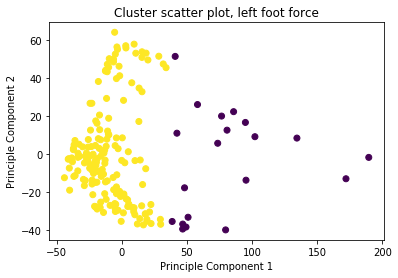

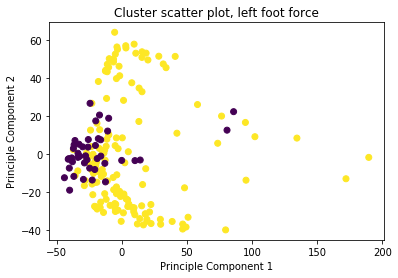

k = 2 :  0.582
k = 3 :  0.531
k = 4 :  0.455
k = 5 :  0.451
k = 6 :  0.372
k = 7 :  0.349
k = 8 :  0.342
k = 9 :  0.357
k = 10 :  0.352

Best k= 2
Best silhouette score= 0.582


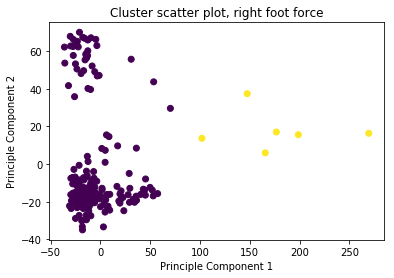

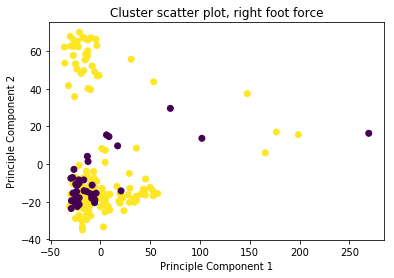

In [6]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/3.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/4.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/5.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/6.png')
plt.show()

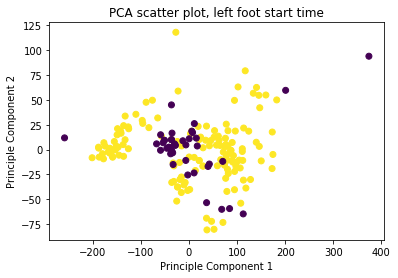

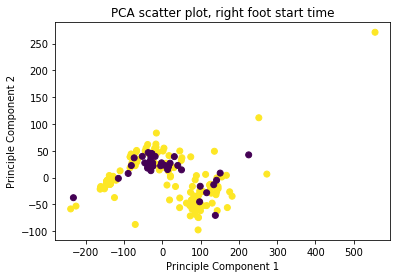

In [7]:
valuesL = data1L.loc[:,startT_cols]
valuesR = data1R.loc[:,startT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/7.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/8.png')
plt.show()

k = 2 :  0.522
k = 3 :  0.601
k = 4 :  0.583
k = 5 :  0.567
k = 6 :  0.514
k = 7 :  0.444
k = 8 :  0.49
k = 9 :  0.448
k = 10 :  0.385

Best k= 3
Best silhouette score= 0.601


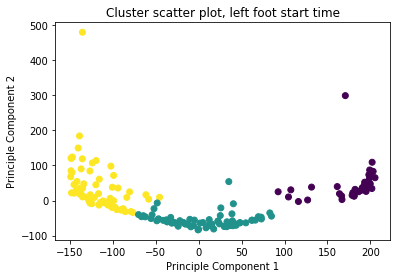

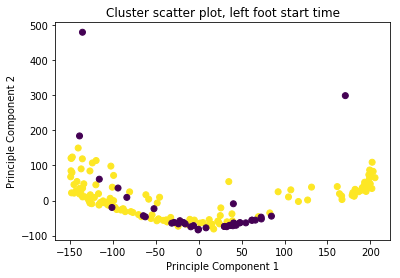

k = 2 :  0.593
k = 3 :  0.618
k = 4 :  0.621
k = 5 :  0.619
k = 6 :  0.624
k = 7 :  0.563
k = 8 :  0.494
k = 9 :  0.552
k = 10 :  0.558

Best k= 6
Best silhouette score= 0.624


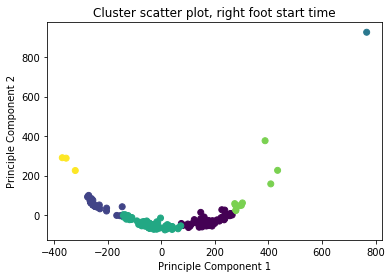

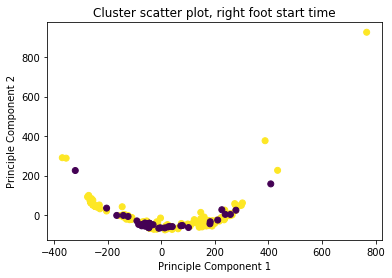

In [8]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/9.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/10.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/11.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/12.png')
plt.show()

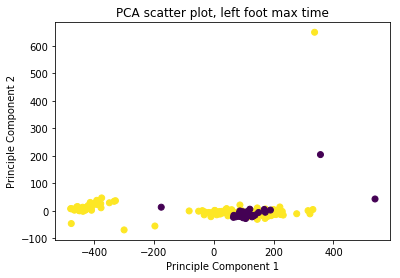

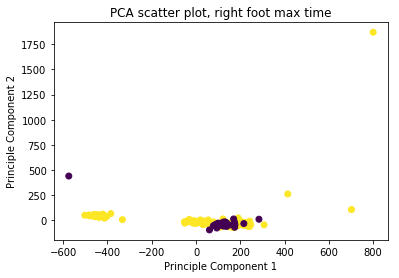

In [9]:
valuesL = data1L.loc[:,maxT_cols]
valuesR = data1R.loc[:,maxT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/13.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/14.png')
plt.show()

k = 2 :  0.819
k = 3 :  0.582
k = 4 :  0.586
k = 5 :  0.566
k = 6 :  0.583
k = 7 :  0.564
k = 8 :  0.548
k = 9 :  0.555
k = 10 :  0.513

Best k= 2
Best silhouette score= 0.819


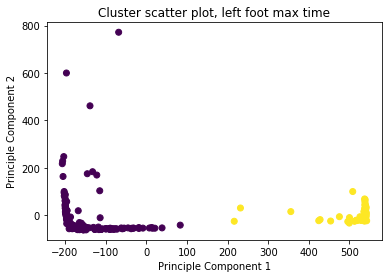

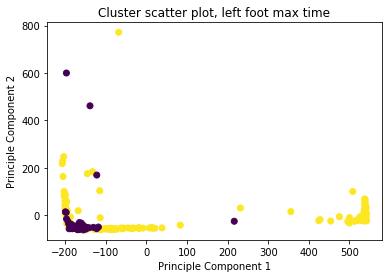

k = 2 :  0.826
k = 3 :  0.837
k = 4 :  0.566
k = 5 :  0.62
k = 6 :  0.623
k = 7 :  0.591
k = 8 :  0.607
k = 9 :  0.606
k = 10 :  0.597

Best k= 3
Best silhouette score= 0.837


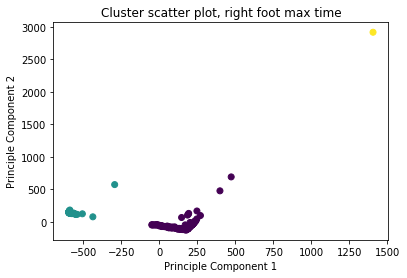

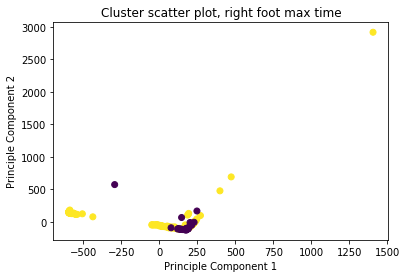

In [10]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/15.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/16.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/17.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/18.png')
plt.show()

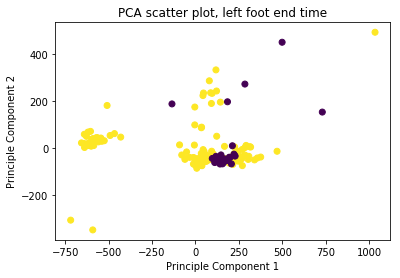

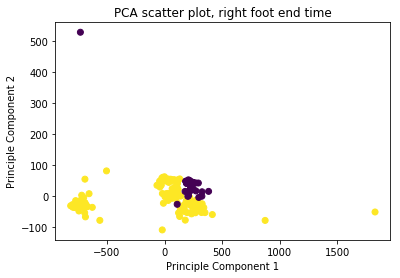

In [11]:
valuesL = data1L.loc[:,endT_cols]
valuesR = data1R.loc[:,endT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/19.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/20.png')
plt.show()

k = 2 :  0.812
k = 3 :  0.81
k = 4 :  0.558
k = 5 :  0.579
k = 6 :  0.591
k = 7 :  0.571
k = 8 :  0.585
k = 9 :  0.597
k = 10 :  0.596

Best k= 2
Best silhouette score= 0.812


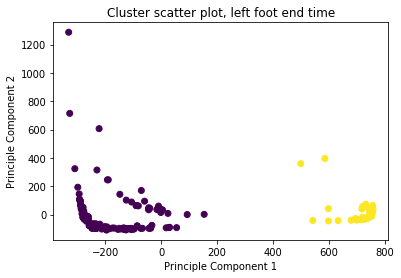

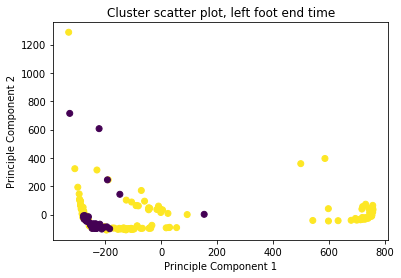

k = 2 :  0.864
k = 3 :  0.868
k = 4 :  0.697
k = 5 :  0.711
k = 6 :  0.692
k = 7 :  0.574
k = 8 :  0.506
k = 9 :  0.493
k = 10 :  0.491

Best k= 3
Best silhouette score= 0.868


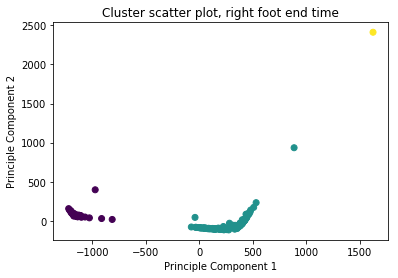

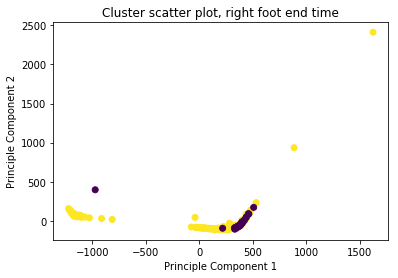

In [12]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/21.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/22.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/23.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/24.png')
plt.show()

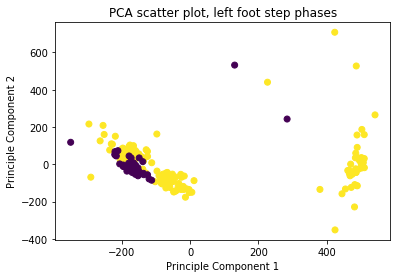

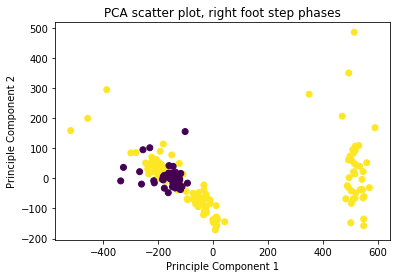

In [13]:
valuesL = data1L.loc[:,phases_cols]
valuesR = data1R.loc[:,phases_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/25.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/26.png')
plt.show()

k = 2 :  0.822
k = 3 :  0.804
k = 4 :  0.591
k = 5 :  0.544
k = 6 :  0.519
k = 7 :  0.38
k = 8 :  0.411
k = 9 :  0.413
k = 10 :  0.403

Best k= 2
Best silhouette score= 0.822


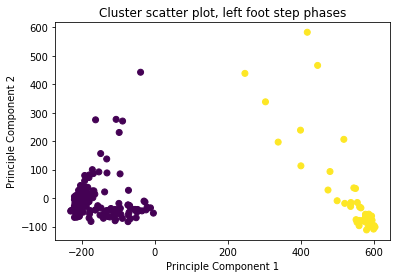

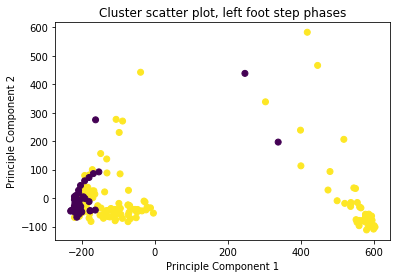

k = 2 :  0.838
k = 3 :  0.646
k = 4 :  0.618
k = 5 :  0.656
k = 6 :  0.559
k = 7 :  0.556
k = 8 :  0.452
k = 9 :  0.44
k = 10 :  0.441

Best k= 2
Best silhouette score= 0.838


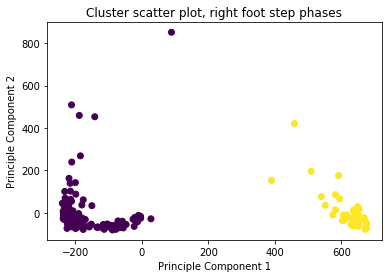

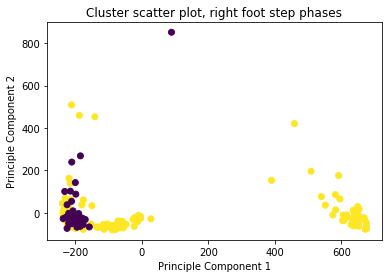

In [14]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/27.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/28.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/29.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot step phases")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/30.png')
plt.show()



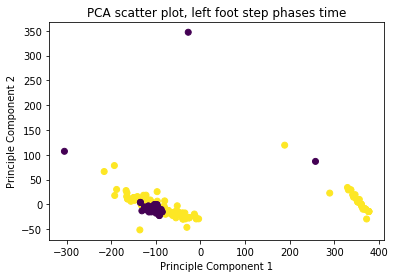

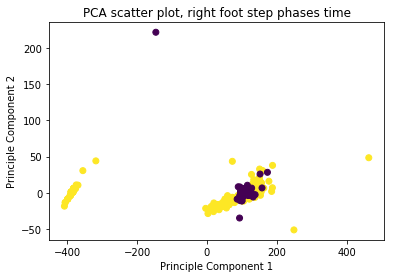

In [15]:
valuesL = data1L.loc[:,phasesT_cols]
valuesR = data1R.loc[:,phasesT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/31.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/32.png')
plt.show()

k = 2 :  0.898
k = 3 :  0.597
k = 4 :  0.612
k = 5 :  0.591
k = 6 :  0.624
k = 7 :  0.577
k = 8 :  0.548
k = 9 :  0.583
k = 10 :  0.496

Best k= 2
Best silhouette score= 0.898


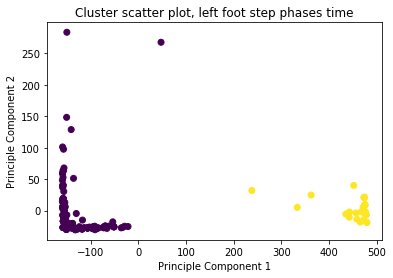

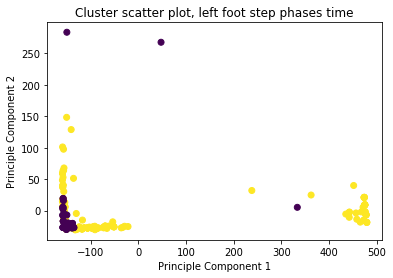

k = 2 :  0.902
k = 3 :  0.668
k = 4 :  0.687
k = 5 :  0.673
k = 6 :  0.626
k = 7 :  0.634
k = 8 :  0.639
k = 9 :  0.606
k = 10 :  0.576

Best k= 2
Best silhouette score= 0.902


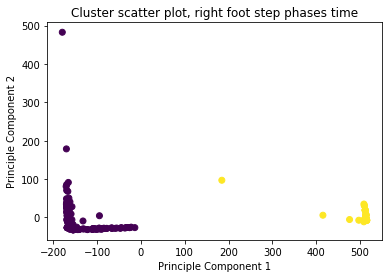

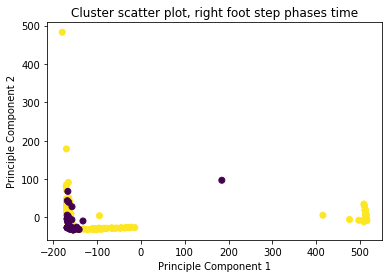

In [16]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/34.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/35.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/36.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot step phases time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/37.png')
plt.show()



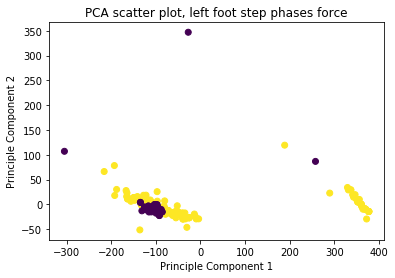

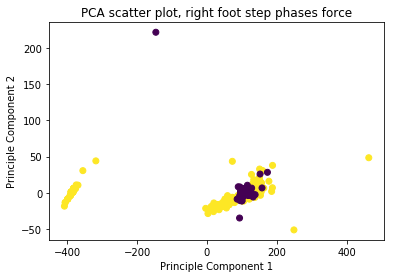

In [17]:
valuesL = data1L.loc[:,phasesF_cols]
valuesR = data1R.loc[:,phasesF_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/38.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/39.png')
plt.show()

k = 2 :  0.898
k = 3 :  0.61
k = 4 :  0.612
k = 5 :  0.623
k = 6 :  0.624
k = 7 :  0.582
k = 8 :  0.565
k = 9 :  0.5
k = 10 :  0.554

Best k= 2
Best silhouette score= 0.898


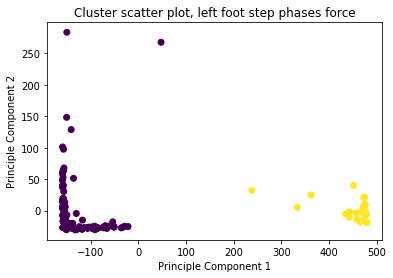

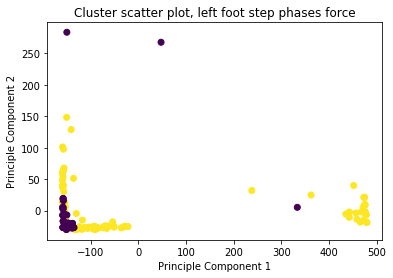

k = 2 :  0.902
k = 3 :  0.668
k = 4 :  0.691
k = 5 :  0.673
k = 6 :  0.626
k = 7 :  0.635
k = 8 :  0.623
k = 9 :  0.599
k = 10 :  0.567

Best k= 2
Best silhouette score= 0.902


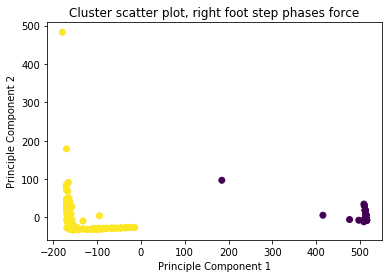

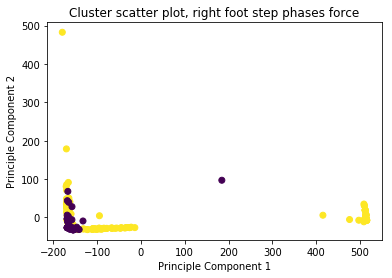

In [18]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/40.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/41.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/42.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot step phases force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/43.png')
plt.show()



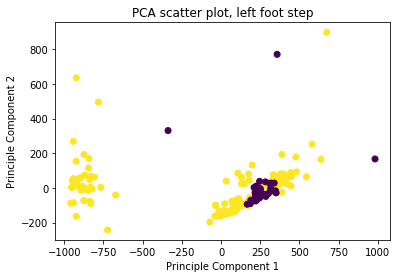

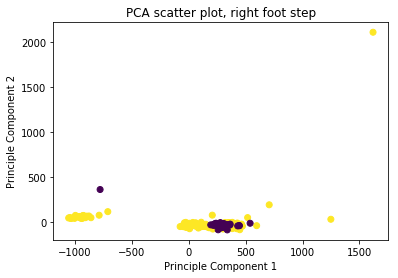

In [19]:
valuesL = data1L.loc[:,features_cols]
valuesR = data1R.loc[:,features_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c=data1L["label"])
plt.title("PCA scatter plot, left foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/44.png')
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c=data1R["label"])
plt.title("PCA scatter plot, right foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/45.png')
plt.show()

k = 2 :  0.824
k = 3 :  0.529
k = 4 :  0.56
k = 5 :  0.535
k = 6 :  0.452
k = 7 :  0.461
k = 8 :  0.493
k = 9 :  0.482
k = 10 :  0.481

Best k= 2
Best silhouette score= 0.824


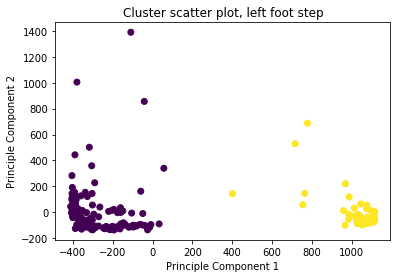

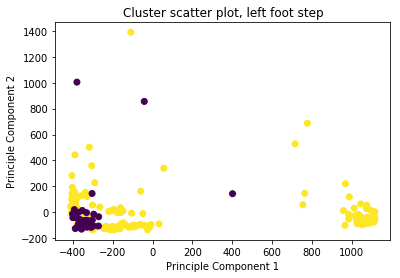

k = 2 :  0.836
k = 3 :  0.849
k = 4 :  0.626
k = 5 :  0.628
k = 6 :  0.542
k = 7 :  0.551
k = 8 :  0.546
k = 9 :  0.342
k = 10 :  0.295

Best k= 3
Best silhouette score= 0.849


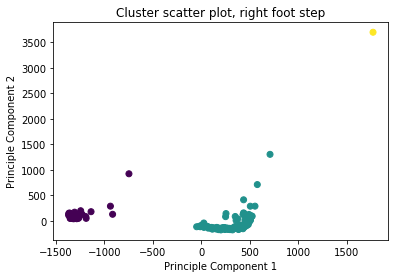

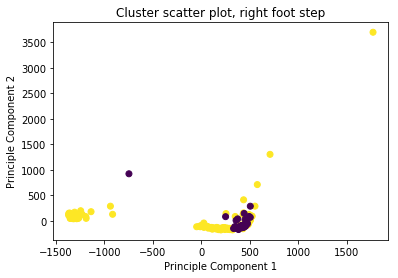

In [20]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/46.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelL)
plt.title("Cluster scatter plot, left foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/47.png')
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/48.png')
plt.show()

#Plot with label colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=labelR)
plt.title("Cluster scatter plot, right foot step")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.savefig('figs/49.png')
plt.show()



For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


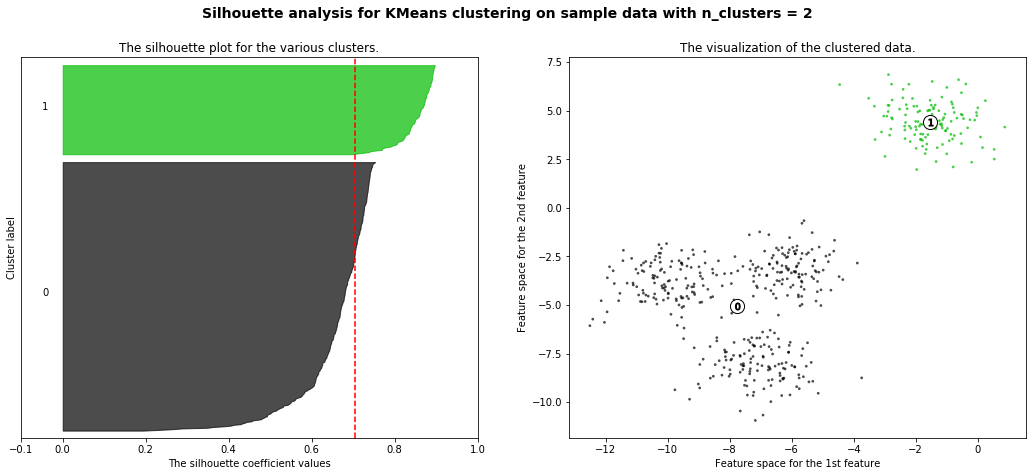

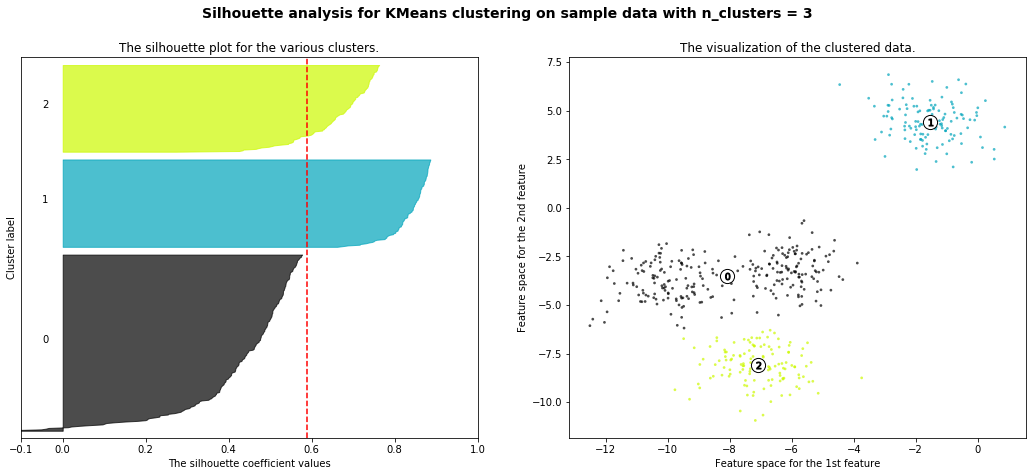

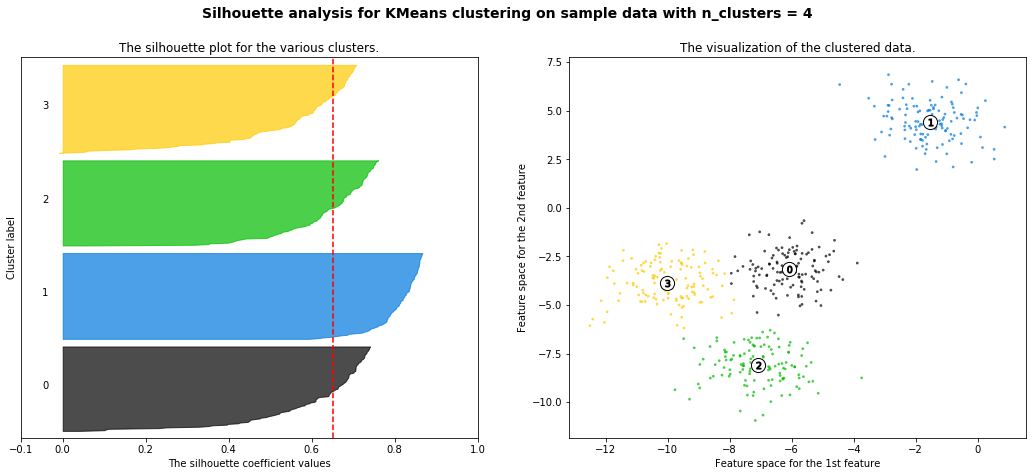

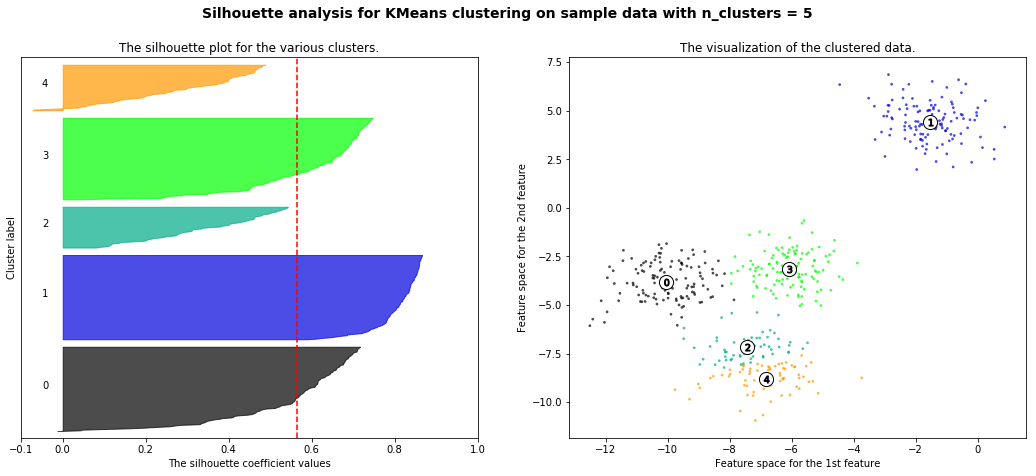

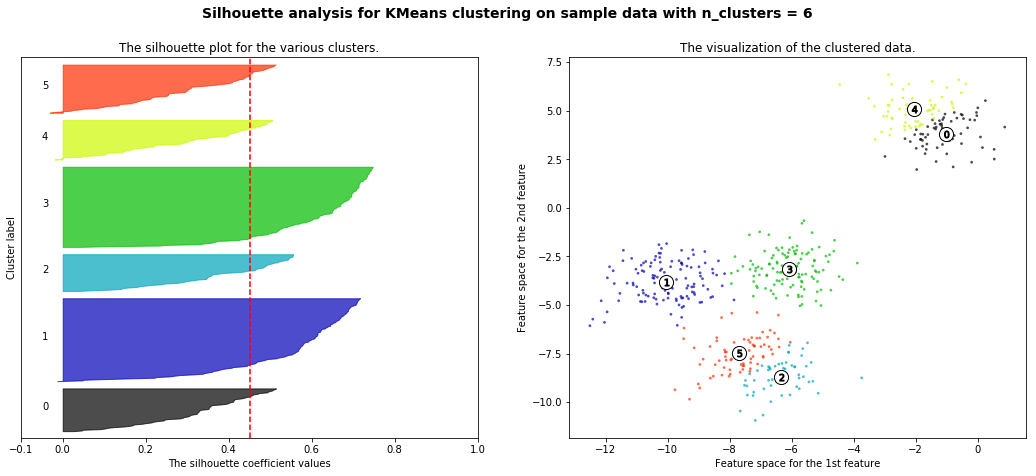

In [21]:
#silhouette graph example


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()